# Lectura de archivos desde Google drive

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd  # show current path

Mounted at /content/gdrive
/content


In [6]:
%cd "/content/gdrive/MyDrive/Artificial Intelligence/Statistics-Modulo"
!ls  # show current directory

/content/gdrive/MyDrive/Artificial Intelligence/Statistics-Modulo
mc-donalds-menu-1.csv  Statistics1.ipynb  Statistics3.ipynb
precios_autos.csv      Statistics2.ipynb


# Importacion de librerias

In [28]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
import seaborn as sns

# Extracción del DataFrame

In [29]:
data = pd.read_csv('precios_autos.csv')

# Información del DataFrame

In [30]:
data.info() # DataSet information. Train file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

# Forma del DataFrame

In [40]:
data.shape # Shape

(205, 21)

# Selección de Variables Cuantitativas

In [43]:
data_cuant = data.drop(columns=['cylindernumber','enginesize','CarName','symboling', 'fueltype', 'carbody', 'drivewheel', 'enginetype', 'stroke','peakrpm','citympg','wheelbase','carlength','carheight','compressionratio','highwaympg','enginelocation'])
data_cuant.head()

,carwidth,curbweight,horsepower,price
0,64.1,2548,111,13495.0
1,64.1,2548,111,16500.0
2,65.5,2823,154,16500.0
3,66.2,2337,102,13950.0
4,66.4,2824,115,17450.0


# Seleccion de Variables Cualitativas

In [51]:
data_cual = data.drop(columns=['drivewheel','CarName','symboling','enginetype', 'stroke','peakrpm','citympg','wheelbase','carlength','carheight','compressionratio','highwaympg','horsepower','carwidth','curbweight','enginesize','cylindernumber'])
data_cual.head()

,fueltype,carbody,enginelocation,price
0,gas,convertible,front,13495.0
1,gas,convertible,front,16500.0
2,gas,hatchback,front,16500.0
3,gas,sedan,front,13950.0
4,gas,sedan,front,17450.0


# Descripción de medidas estadistícas para las Variables Cuantitativas.

In [52]:
data_cuant.describe()

,carwidth,curbweight,horsepower,price
count,205.000000,205.000000,205.000000,205.000000
mean,65.907805,2555.565854,104.117073,13276.710571
std,2.145204,520.680204,39.544167,7988.852332
min,60.300000,1488.000000,48.000000,5118.000000
25%,64.100000,2145.000000,70.000000,7788.000000
50%,65.500000,2414.000000,95.000000,10295.000000
75%,66.900000,2935.000000,116.000000,16503.000000
max,72.300000,4066.000000,288.000000,45400.000000


count: Indica la cantidad total de observaciones en el conjunto de datos. En este caso, hay 205 observaciones para cada variable.

mean: Es el valor promedio de los datos en la variable. Por ejemplo, el ancho promedio del auto (carwidth) es aproximadamente 65.91, el peso promedio en vacío del auto (curbweight) es aproximadamente 2555.57, la potencia promedio (horsepower) es aproximadamente 104.12, y el precio promedio (price) es aproximadamente 13276.71.

std: Representa la desviación estándar, que es una medida de la dispersión de los datos alrededor de la media. Un valor de desviación estándar más alto indica una mayor variabilidad en los datos. Por ejemplo, la desviación estándar del ancho del auto (carwidth) es aproximadamente 2.15, del peso en vacío del auto (curbweight) es aproximadamente 520.68, de la potencia (horsepower) es aproximadamente 39.54, y del precio (price) es aproximadamente 7988.85.

min: Es el valor mínimo en la variable. Por ejemplo, el valor mínimo del ancho del auto es 60.3, del peso en vacío del auto es 1488, de la potencia es 48 y del precio es 5118.

25% (percentil 25): Es el valor por debajo del cual se encuentra el 25% de los datos. Por ejemplo, el 25% de los autos tienen un ancho menor o igual a 64.1, un peso en vacío menor o igual a 2145, una potencia menor o igual a 70 y un precio menor o igual a 7788.

50% (percentil 50): Es el valor que divide los datos en dos partes iguales, también conocido como la mediana. Por ejemplo, la mediana del ancho del auto es 65.5, del peso en vacío del auto es 2414, de la potencia es 95 y del precio es 10295.

75% (percentil 75): Es el valor por debajo del cual se encuentra el 75% de los datos. Por ejemplo, el 75% de los autos tienen un ancho menor o igual a 66.9, un peso en vacío menor o igual a 2935, una potencia menor o igual a 116 y un precio menor o igual a 16503.

max: Es el valor máximo en la variable. Por ejemplo, el valor máximo del ancho del auto es 72.3, del peso en vacío del auto es 4066, de la potencia es 288 y del precio es 45400.

# Matriz de correlacion para las Variables Cuantitativas.

<Axes: >

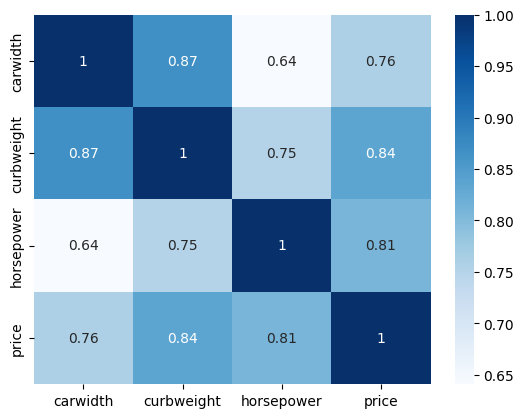

In [61]:
# Correlaciones
correlation_matrix = data_cuant.corr()
sb.heatmap(correlation_matrix, cmap = 'Blues', annot = True)

A continuación se mostrará la lectura de los datos de la matriz de correlación en funcion al precio dado que son variables cuantitativas que nos pueden ayudar a estudiar detalladamente el precio del automovil:


carwidth vs. price: El coeficiente de correlación entre el ancho del auto (carwidth) y el precio (price) es 0.759, indicando una correlación positiva moderada. Esto sugiere que hay cierta relación entre el ancho del auto y su precio, pero no es tan fuerte como otras correlaciones en la matriz.


curbweight vs. price: El coeficiente de correlación entre el peso en vacío del auto (curbweight) y el precio (price) es 0.835, lo que indica una correlación positiva fuerte. Esto sugiere que los autos más pesados tienden a tener precios más altos.

horsepower vs. price: El coeficiente de correlación entre la potencia (horsepower) y el precio (price) es 0.808, indicando una correlación positiva fuerte. Esto sugiere que los autos con mayor potencia tienden a tener precios más altos.

# Relación para cada una Variables Cuantitativas con el precio.

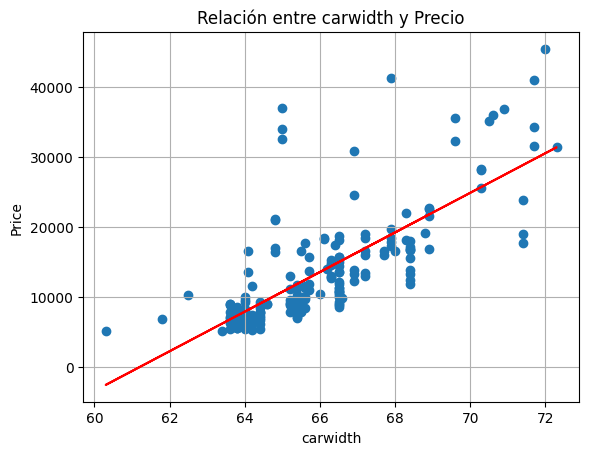

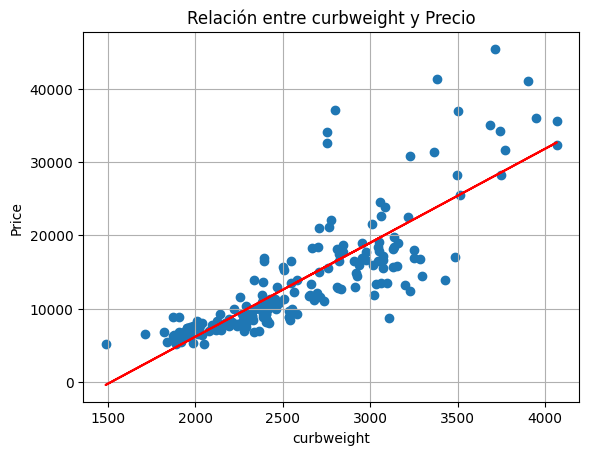

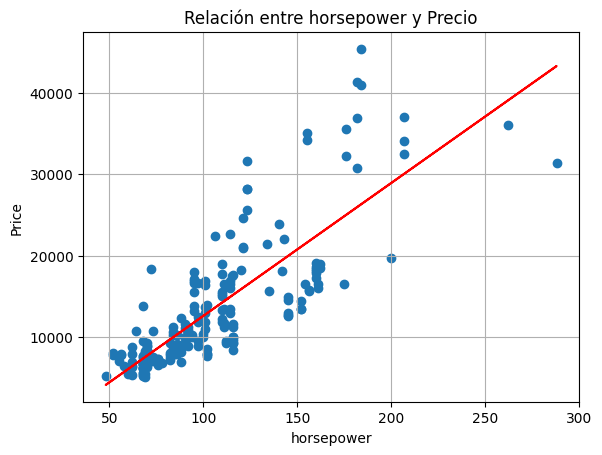

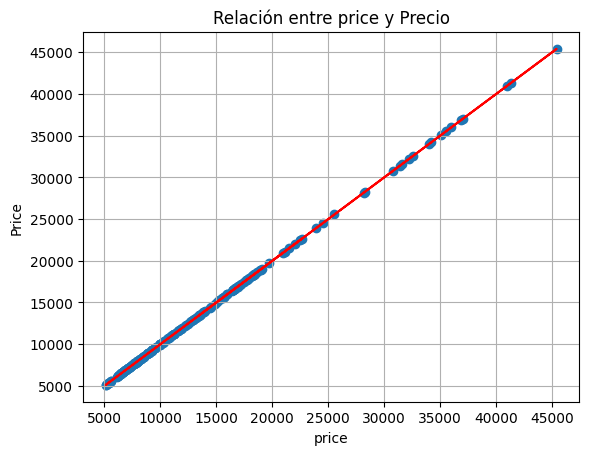

In [67]:
from sklearn.linear_model import LinearRegression

for column in data_cuant[:2]:
    plt.scatter(data_cuant[column], data_cuant['price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Relación entre {column} y Precio')

    # Realizar la regresión lineal
    X = data_cuant[[column]]
    y = data_cuant['price']
    model = LinearRegression()
    model.fit(X, y)

    # Predecir los valores usando el modelo
    y_pred = model.predict(X)

    # Graficar la línea de regresión
    plt.plot(X, y_pred, color='red')

    plt.grid()
    plt.show()


Como pudimos observar en la matriz de correlación, cada una de estas variables cauntitativas tiene una correlacion positiva con el precio, la cuál esta por arriba del 70%. En cada una de estas se llevo acabo una regresion lineal con el fin de predecir el comportamiento de estos datos.

En la primera gráfica, se puede ver que a medida que aumenta el ancho del auto, el precio también tienda a aumentar.

En la segunda gráfica, se puede examinar que a medida que aumenta el peso en vacío del auto, el precio también aumente de manera significativa.

En la tercera gráfica, se puede observar que un aumento en la potencia del motor esté relacionado con un aumento en el precio del automóvil.

# Histogramas de frecuencia y diagramas de caja y bigotes para cada una de las Variables Cuantitativas.

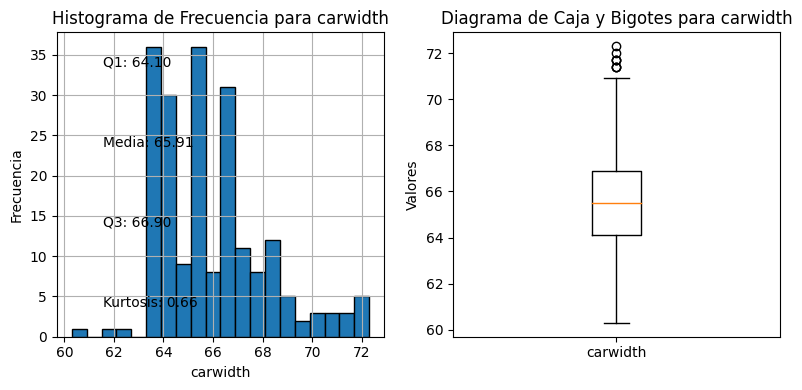

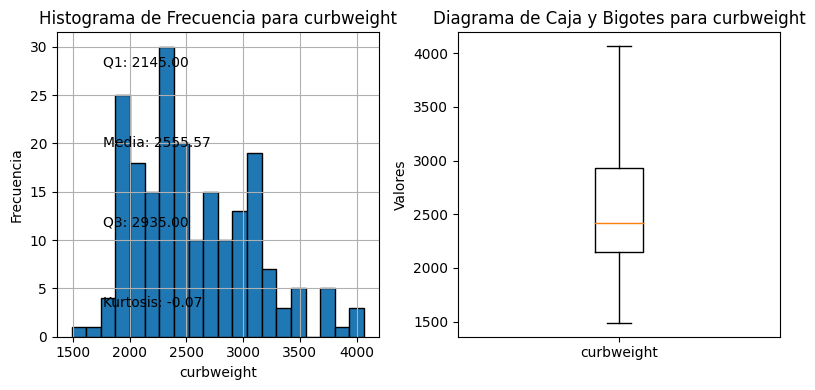

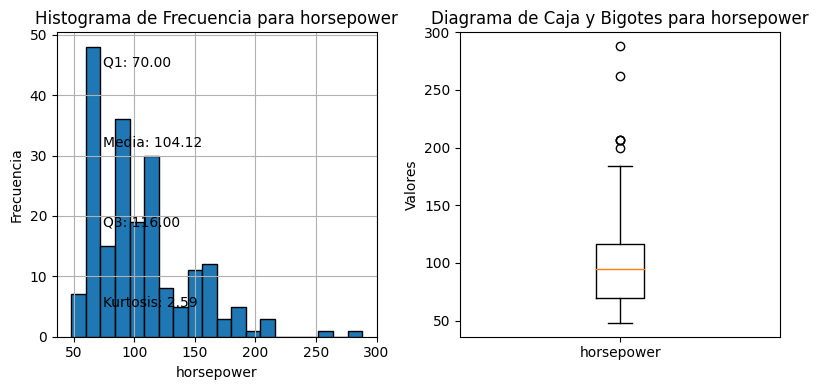

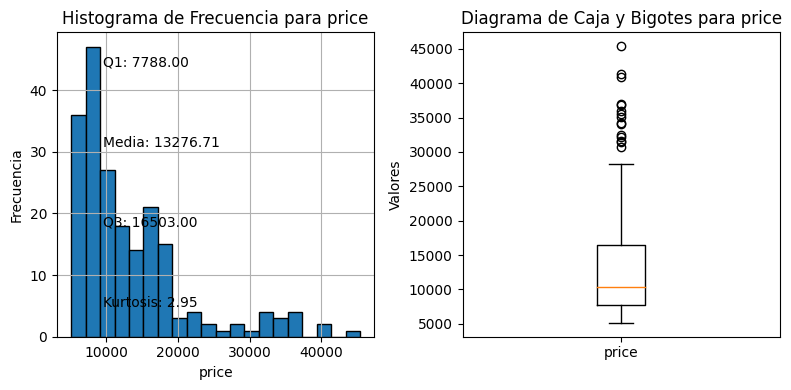

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# Variables cuantitativas que deseas analizar
variables = ['carwidth', 'curbweight', 'horsepower', 'price']

# Calcular cuartiles y crear gráficos de cuartiles y histogramas
for var in variables:
    q1 = np.percentile(data_cuant[var], 25)
    mean = np.mean(data_cuant[var])  # Media en lugar de mediana
    q3 = np.percentile(data_cuant[var], 75)

    plt.figure(figsize=(8, 4))

    # Histograma de frecuencia
    plt.subplot(1, 2, 1)
    plt.hist(data_cuant[var], bins=20, edgecolor='black')
    plt.title(f'Histograma de Frecuencia para {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.grid()

    # Gráfico de caja y bigotes
    plt.subplot(1, 2, 2)
    plt.boxplot(data_cuant[var])
    plt.title(f'Diagrama de Caja y Bigotes para {var}')
    plt.ylabel('Valores')
    plt.xticks([1], [var])
    plt.figtext(0.135, 0.82, f'Q1: {q1:.2f}')
    plt.figtext(0.135, 0.62, f'Media: {mean:.2f}')  # Mostrar media en lugar de mediana
    plt.figtext(0.135, 0.42, f'Q3: {q3:.2f}')
    # Coeficiente de curtosis
    kurtosis = scipy.stats.kurtosis(data_cuant[var])
    plt.figtext(0.135, 0.22, f'Kurtosis: {kurtosis:.2f}')

    plt.tight_layout()
    plt.show()



1er par de gráficas.

Q1 (Primer Cuartil): El valor Q1 de 64.10 indica que el 25% de los datos en la distribuacion de Carwidth son menores o iguales a 64.10. En otras palabras, el 25% de los valores están en el primer cuarto de la distribución.

Media (Promedio): La media de 65.91 es el promedio aritmético de todos los valores en  la distribuacion de Carwidth. Es el punto central de la distribución y se encuentra entre Q1 y Q3. En esta distribuacion, se puede ver que la media está un poco desplazada hacia la derecha en relación con Q1, lo que podría predecir que hay valores más altos en la parte superior de la distribución de Carwidth .

Q3 (Tercer Cuartil): El valor Q3 de 66.90 indica que el 75% de los datos en la distribución son menores o iguales a 66.90. En otras palabras, el 75% de los valores están en los tres primeros cuartos de la distribución de Carwidth.

Kurtosis: En este caso con una kurtosis de 0.66, la distribución es un poco menos puntiaguda en las colas que una distribución normal, pero aún así se considera relativamente cercana a una distribución normal.

Diagrama de caja y bigotes:

Podemos ver anomalias de datos por arriba de 70. Sin embargo, no estan muy lejanos a el tercer cuartil lo cual se podria considerar a errores en la recogida de los datos.

2do par gráfica.

Q1 (Primer Cuartil): El valor Q1 de 2145 indica que el 25% de los datos en la distribución de Curbweight son menores o iguales a 2145. En otras palabras, el 25% de los valores están en el primer cuarto de la misma.

Media (Promedio): La media de 2555 es el promedio aritmético de todos los valores en la distribución. Es el punto central de la distribución y se encuentra entre Q1 y Q3. La media te indica el valor central típico de la variable "Curbweight".

Q3 (Tercer Cuartil): El valor Q3 de 2935 indica que el 75% de los datos en tu distribución son menores o iguales a 2935. En otras palabras, el 75% de los valores están en los tres primeros cuartos de la distribución de Curbweight.

Kurtosis: El valor de kurtosis de -0.07 sugiere que la distribución tiene una aplanación en sus colas en comparación con una distribución normal.

Diagrama de caja y bigotes:

Podemos ver anomalias de datos por arriba de 250. Lo cual se puede interpretar como carros deportivos que muy poca gente compra, algo que no se encuentra dentro de la media.


3er par de gráficas.

Q1 (Primer Cuartil): El valor Q1 de 70 indica que el 25% de los datos en la distribución son menores o iguales a 70. En otras palabras, el 25% de los valores están en el primer cuarto de la distribución.

Media (Promedio): La media de 104.12 es el promedio aritmético de todos los valores en tu distribución. Es el punto central de la distribución y se encuentra entre Q1 y Q3. La media te indica el valor central típico de la variable "Horsepower".

Q3 (Tercer Cuartil): El valor Q3 de 116 indica que el 75% de los datos en tu distribución son menores o iguales a 116. Así mismo, el 75% de los valores están en los tres primeros cuartos de la distribución.

Kurtosis: El valor de kurtosis de 2.59 sugiere que la distribución tiene colas más pesadas en comparación con una distribución normal. Aunado a esto, la distribución podría tener valores extremos más frecuentes en comparación con una distribución normal estándar.


# Graficos de barra con driagramas de caja y bigotes de Variables Cualitativas.

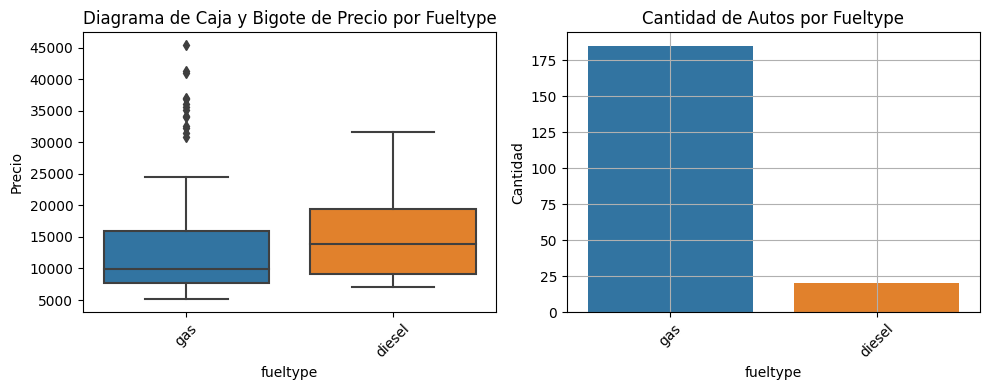

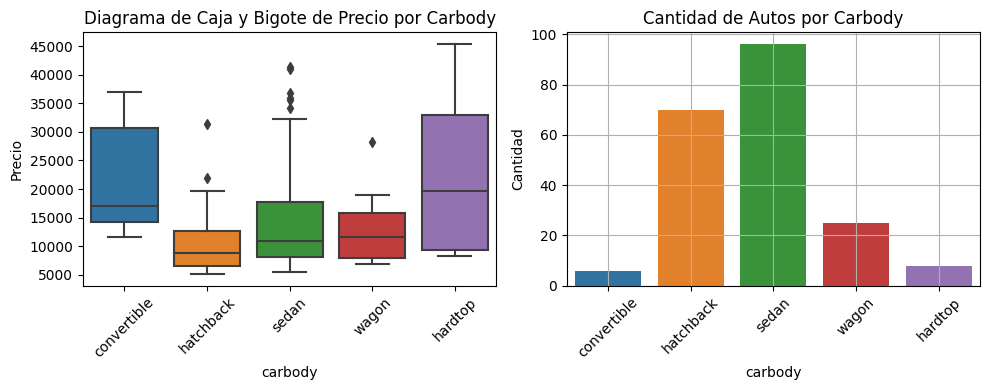

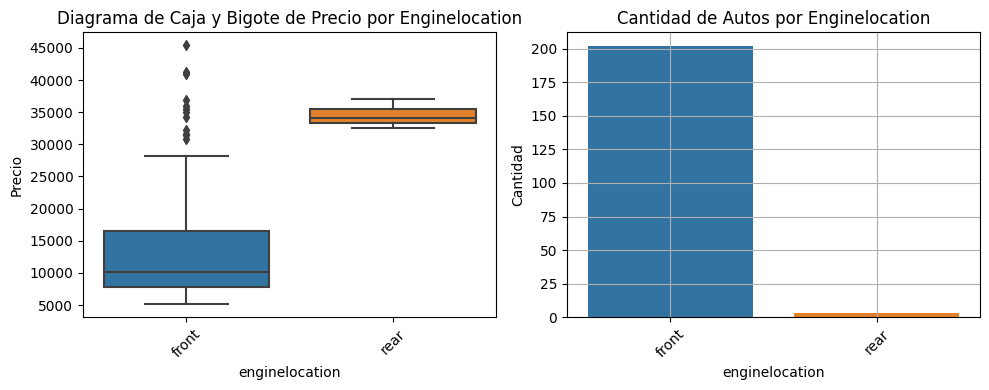

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas a analizar
columns_to_analyze = ['fueltype', 'carbody', 'enginelocation']

# Iterar a través de las columnas
for column in columns_to_analyze:
    unique_values = data_cual[column].unique()

    plt.figure(figsize=(10, 4))

    # Diagrama de caja y bigote
    plt.subplot(1, 2, 1)
    sns.boxplot(x=column, y='price', data=data)
    plt.xlabel(column)
    plt.ylabel('Precio')
    plt.title(f'Diagrama de Caja y Bigote de Precio por {column.capitalize()}')
    plt.xticks(rotation=45)

    # Gráfico de barras
    plt.subplot(1, 2, 2)
    sns.countplot(x=column, data=data)
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.title(f'Cantidad de Autos por {column.capitalize()}')
    plt.xticks(rotation=45)
    plt.grid()

    plt.tight_layout()
    plt.show()


1er par de gráficas cualitativas.

En la gráfica de barras, es evidente que en nuestra base de datos predomina un mayor número de automóviles que utilizan gasolina como combustible, en comparación con los que utilizan diesel. Esta tendencia es comprensible dada la prevalencia del sistema de combustión a gasolina en la industria automotriz actual.

Al examinar los diagramas de caja y bigotes, observamos una dispersión significativa de valores atípicos en la relación entre el precio y el tipo de combustible. Esta particularidad podría indicar que la adquisición de automóviles deportivos es menos común, ya que tienden a tener precios más elevados en comparación con los vehículos convencionales.


2do par de gráficas cualitativas.

Al analizar las gráficas correspondientes, podemos inferir que los vehículos más comunes son los sedanes, lo cual es claramente evidente en el diagrama de caja y bigotes debido a que su media de precios es la segunda más baja. Además, los valores atípicos de esta categoría están notablemente distantes de la media, lo que podría interpretarse como posibles errores en la recopilación de datos o la presencia de vehículos nuevos o seminuevos ofrecidos por un grupo selecto de concesionarias.


3er par de gráficas cualitativas.

Al examinar detenidamente ambas gráficas, es evidente que la mayoría de los automóviles tienen sus motores ubicados en la parte delantera, una característica muy común en los vehículos convencionales en la sociedad actual. Esta disposición no se diseña generalmente para carreras o altas velocidades, a diferencia de los automóviles deportivos que a menudo presentan motores montados en la parte trasera debido a varias razones relacionadas con el rendimiento y la dinámica de conducción. Además, los valores atípicos en la sección de los automóviles con motores delanteros no necesariamente deben ser eliminados, ya que algunos lujos incorporados en los automóviles pueden aumentar su precio.